<a href="https://colab.research.google.com/github/zhestyatsky/MCL-WiC/blob/main/experiments/data_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/zhestyatsky/MCL-WiC.git MCL-WiC

import sys
sys.path.insert(0, '/content/MCL-WiC')

Cloning into 'MCL-WiC'...
remote: Enumerating objects: 665, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 665 (delta 20), reused 28 (delta 12), pack-reused 620
Receiving objects: 100% (665/665), 5.67 MiB | 15.20 MiB/s, done.
Resolving deltas: 100% (338/338), done.


In [2]:
!pip install --upgrade -r MCL-WiC/requirements.txt

     |████████████████████████████████| 12.8MB 304kB/s 
     |████████████████████████████████| 7.0MB 37.0MB/s 
     |████████████████████████████████| 776.8MB 24kB/s 
     |████████████████████████████████| 696kB 38.1MB/s 
     |████████████████████████████████| 1.8MB 28.9MB/s 
     |████████████████████████████████| 1.2MB 30.5MB/s 
     |████████████████████████████████| 22.3MB 1.6MB/s 
     |████████████████████████████████| 276kB 55.6MB/s 
     |████████████████████████████████| 829kB 32.7MB/s 
     |████████████████████████████████| 112kB 45.6MB/s 
     |████████████████████████████████| 901kB 29.9MB/s 
     |████████████████████████████████| 2.9MB 30.8MB/s 
     |████████████████████████████████| 1.3MB 27.9MB/s 
     |████████████████████████████████| 143kB 58.0MB/s 
     |████████████████████████████████| 296kB 59.4MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44620 sha256=310a2c7c217144adfbfd08165add6aae4f4689bf55c088980ff7446ff3c62c00

In [3]:
import src.data.reading as reading

wic_train = reading.read_wic_train()
wic_dev = reading.read_wic_dev()
wic_test = reading.read_wic_test()

print(wic_train.shape, wic_dev.shape, wic_test.shape)

(8000, 10) (1000, 10) (1000, 10)


In [4]:
wic_train.head()

,id,lemma,pos,sentence1,sentence2,start1,end1,start2,end2,tag
0,training.en-en.0,play,NOUN,In that context of coordination and integratio...,A musical play on the same subject was also st...,69,73,10,14,0
1,training.en-en.1,play,NOUN,In that context of coordination and integratio...,"In schools, when water is needed, it is girls ...",69,73,112,116,0
2,training.en-en.2,esteem,NOUN,We would also like to convey our esteem and co...,"Father Lini said that, because of that, the Un...",33,39,106,112,1
3,training.en-en.3,esteem,NOUN,We would also like to convey our esteem and co...,This attests to the esteem and trust enjoyed b...,33,39,20,26,1
4,training.en-en.4,holder,NOUN,This growth is the direct result of the increa...,A person may be either the holder of an option...,74,81,27,33,1


In [45]:
wic_real_train, wic_real_dev, _ = reading.get_train_val_test_df(use_default_datasets=False)
print(wic_real_train.shape, wic_real_dev.shape)

(14680, 10) (386, 10)


### Посмотрим на распределение слов по частям речи

In [49]:
import matplotlib.pyplot as plt

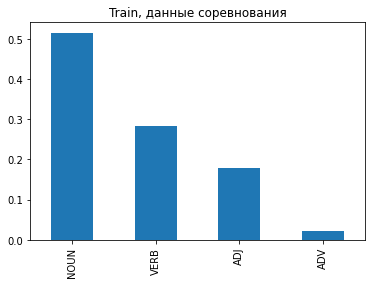

In [52]:
plt.title('Train, данные соревнования')
wic_train['pos'].value_counts(normalize=True).plot(kind='bar')

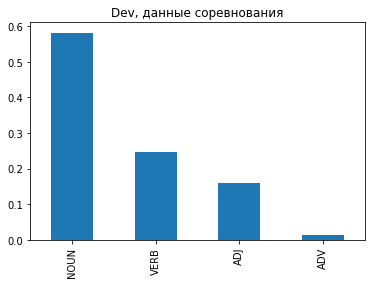

In [53]:
plt.title('Dev, данные соревнования')
wic_dev['pos'].value_counts(normalize=True).plot(kind='bar')

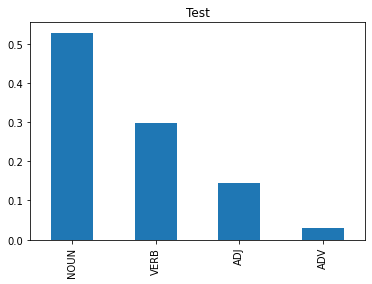

In [63]:
plt.title('Test')
wic_test['pos'].value_counts(normalize=True).plot(kind='bar')

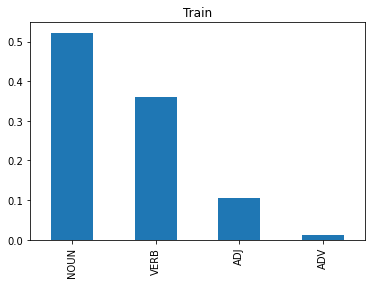

In [64]:
plt.title('Train')
wic_real_train['pos'].value_counts(normalize=True).plot(kind='bar')

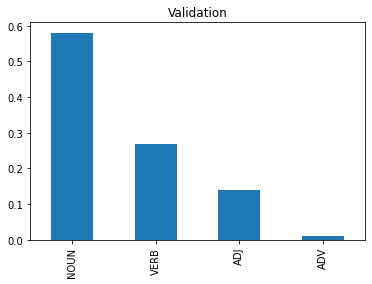

In [65]:
plt.title('Validation')
wic_real_dev['pos'].value_counts(normalize=True).plot(kind='bar')

### Каждое слово встречается в 2, 4 или 6 парах предложений

In [72]:
wic_train['lemma'].value_counts().value_counts(normalize=True)

2    0.928341
4    0.069780
6    0.001879
Name: lemma, dtype: float64

In [9]:
wic_dev['lemma'].value_counts().value_counts()

2    486
4      7
Name: lemma, dtype: int64

In [71]:
wic_test['lemma'].value_counts().value_counts(normalize=True)

2    0.977505
4    0.022495
Name: lemma, dtype: float64

In [73]:
wic_real_train['lemma'].value_counts().value_counts(normalize=True)

2     0.642721
1     0.098618
3     0.087141
4     0.060999
5     0.028905
6     0.018704
7     0.010840
8     0.010627
9     0.006376
11    0.004463
10    0.004038
12    0.004038
13    0.002338
16    0.001913
15    0.001275
17    0.001275
14    0.001275
18    0.001063
33    0.000850
19    0.000850
44    0.000850
20    0.000638
34    0.000638
24    0.000638
21    0.000638
36    0.000638
39    0.000425
46    0.000425
42    0.000425
25    0.000425
31    0.000425
28    0.000425
57    0.000425
55    0.000425
43    0.000425
27    0.000425
30    0.000425
40    0.000213
32    0.000213
63    0.000213
60    0.000213
29    0.000213
37    0.000213
41    0.000213
49    0.000213
85    0.000213
22    0.000213
26    0.000213
50    0.000213
23    0.000213
61    0.000213
Name: lemma, dtype: float64

In [69]:
wic_real_dev['lemma'].value_counts().value_counts()

2     79
1     15
3      9
4      5
5      3
6      2
37     1
23     1
20     1
16     1
15     1
11     1
10     1
7      1
Name: lemma, dtype: int64

### Тэги True и False втречаются одинаково часто

In [11]:
wic_train['tag'].value_counts()

1    4000
0    4000
Name: tag, dtype: int64

In [12]:
wic_dev['tag'].value_counts()

1    500
0    500
Name: tag, dtype: int64

In [13]:
wic_test['tag'].value_counts()

1    500
0    500
Name: tag, dtype: int64

In [74]:
wic_real_train['tag'].value_counts()

1    7342
0    7338
Name: tag, dtype: int64

In [75]:
wic_real_dev['tag'].value_counts()

0    195
1    191
Name: tag, dtype: int64

In [76]:
wic_test['tag'].value_counts()

1    500
0    500
Name: tag, dtype: int64

### Посмотрим, как часто слова употребляются в одинаковых значениях и как часто в разных, а также в каком соотношении

In [14]:
import pandas as pd


def get_lemma_tag_stats(df):
  lemma_tag_stats_df = pd.DataFrame(columns=['lemma', 'true_tag_count', 'false_tag_count'])

  for lemma, tag_df in df[['lemma', 'tag']].value_counts().reset_index(name='tag_count').groupby('lemma'):
      tag_stats = {
          'lemma': lemma,
          'true_tag_count': 0,
          'false_tag_count': 0
      }

      for _, (_, tag, tag_count) in tag_df.iterrows():
          if tag == 1:
              tag_stats['true_tag_count'] = tag_count
          elif tag == 0:
              tag_stats['false_tag_count'] = tag_count
          else:
              raise RuntimeError(f'Unknown tag: {tag}')

      lemma_tag_stats_df = lemma_tag_stats_df.append(tag_stats, ignore_index=True)
  return lemma_tag_stats_df

In [15]:
wic_train_lemma_tag_stats = get_lemma_tag_stats(wic_train)
wic_dev_lemma_tag_stats = get_lemma_tag_stats(wic_dev)
wic_test_lemma_tag_stats = get_lemma_tag_stats(wic_test)

In [77]:
wic_real_train_lemma_tag_stats = get_lemma_tag_stats(wic_real_train)
wic_real_dev_lemma_tag_stats = get_lemma_tag_stats(wic_real_dev)

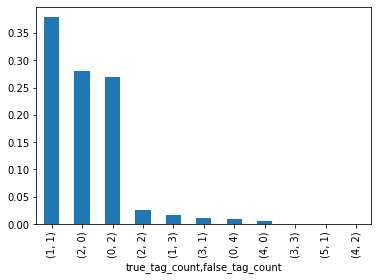

In [16]:
wic_train_lemma_tag_stats[['true_tag_count', 'false_tag_count']].value_counts(normalize=True).plot(kind='bar')

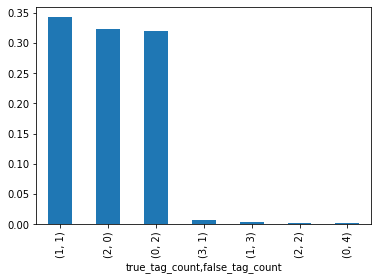

In [17]:
wic_dev_lemma_tag_stats[['true_tag_count', 'false_tag_count']].value_counts(normalize=True).plot(kind='bar')

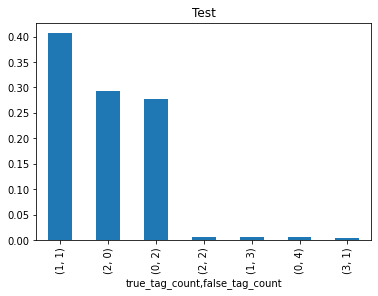

In [87]:
plt.title('Test')
wic_test_lemma_tag_stats[['true_tag_count', 'false_tag_count']].value_counts(normalize=True).plot(kind='bar')

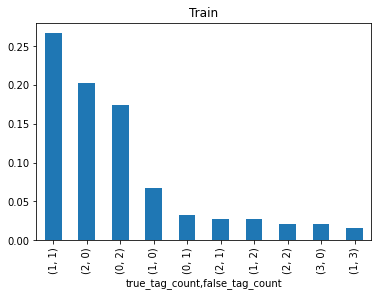

In [93]:
plt.title('Train')
wic_real_train_lemma_tag_stats[['true_tag_count', 'false_tag_count']].value_counts(normalize=True).nlargest(10).plot(kind='bar')

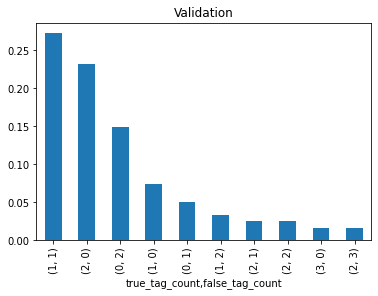

In [94]:
plt.title('Validation')
wic_real_dev_lemma_tag_stats[['true_tag_count', 'false_tag_count']].value_counts(normalize=True).nlargest(10).plot(kind='bar')

### Посмотрим, в каких частях речи встречаются слова, и в каком соотношении

In [19]:
def get_lemma_pos_stats(df):
  lemma_pos_stats_df = pd.DataFrame(columns=['lemma', 'noun_count', 'verb_count', 'adj_count', 'adv_count'])

  for lemma, pos_df in df[['lemma', 'pos']].value_counts().reset_index(name='pos_count').groupby('lemma'):
      pos_stats = {
          'lemma': lemma,
          'noun_count': 0,
          'verb_count': 0,
          'adj_count': 0,
          'adv_count': 0
      }

      for _, (_, pos, pos_count) in pos_df.iterrows():
          if pos == 'NOUN':
              pos_stats['noun_count'] = pos_count
          elif pos == 'VERB':
              pos_stats['verb_count'] = pos_count
          elif pos == 'ADJ':
              pos_stats['adj_count'] = pos_count
          elif pos == 'ADV':
              pos_stats['adv_count'] = pos_count
          else:
              raise RuntimeError('Unknown pos: {}'.format(pos))

      lemma_pos_stats_df = lemma_pos_stats_df.append(pos_stats, ignore_index=True)
  
  return lemma_pos_stats_df

In [20]:
wic_train_lemma_pos_stats = get_lemma_pos_stats(wic_train)
wic_dev_lemma_pos_stats = get_lemma_pos_stats(wic_dev)
wic_test_lemma_pos_stats = get_lemma_pos_stats(wic_test)

In [89]:
wic_real_train_lemma_pos_stats = get_lemma_pos_stats(wic_real_train)
wic_real_dev_lemma_pos_stats = get_lemma_pos_stats(wic_real_dev)

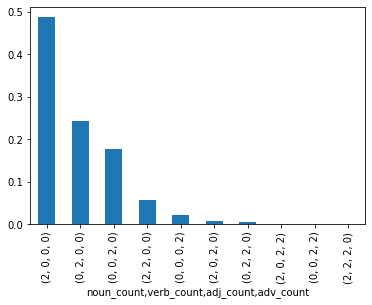

In [21]:
wic_train_lemma_pos_stats[['noun_count', 'verb_count', 'adj_count', 'adv_count']].value_counts(normalize=True).plot(kind='bar')

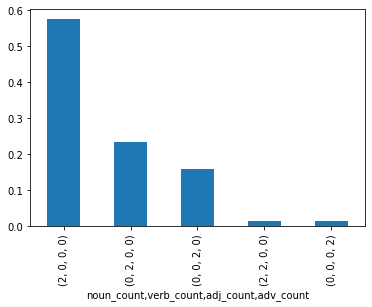

In [22]:
wic_dev_lemma_pos_stats[['noun_count', 'verb_count', 'adj_count', 'adv_count']].value_counts(normalize=True).plot(kind='bar')

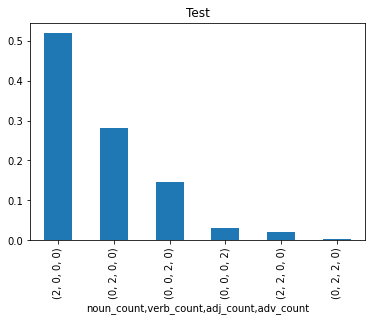

In [88]:
plt.title('Test')
wic_test_lemma_pos_stats[['noun_count', 'verb_count', 'adj_count', 'adv_count']].value_counts(normalize=True).plot(kind='bar')

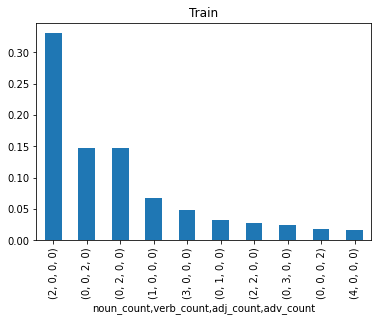

In [91]:
plt.title('Train')
wic_real_train_lemma_pos_stats[['noun_count', 'verb_count', 'adj_count', 'adv_count']].value_counts(normalize=True).nlargest(10).plot(kind='bar')

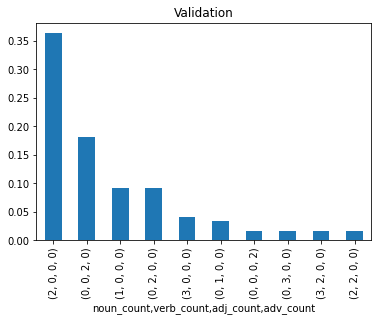

In [92]:
plt.title('Validation')
wic_real_dev_lemma_pos_stats[['noun_count', 'verb_count', 'adj_count', 'adv_count']].value_counts(normalize=True).nlargest(10).plot(kind='bar')

In [108]:
superglue_train = reading.read_superglue_train()
superglue_dev = reading.read_superglue_dev()

In [111]:
def get_all_common_lemmas(df1, df2):
  return set(df1['lemma'].to_numpy()) & set(df2['lemma'].to_numpy())

def get_all_common_lemmas_three(df1, df2, df3):
  return set(df1['lemma'].to_numpy()) & set(df2['lemma'].to_numpy()) & set(df3['lemma'].to_numpy())


def get_intersect_ratio(df, common_lemmas):
  return len(df[df['lemma'].isin(common_lemmas)]) / len(df) * 100


#common_lemmas_wic_train_dev = get_all_common_lemmas(wic_train, wic_dev)
#common_lemmas_wic_train_test = get_all_common_lemmas(wic_train, wic_test)
#common_lemmas_wic_dev_test = get_all_common_lemmas(wic_dev, wic_test)
#common_lemmas_wic_all = common_lemmas_wic_train_dev & common_lemmas_wic_train_test
#
#wic_train_intersection_ratio_for_train_dev = get_intersect_ratio(wic_train, common_lemmas_wic_train_dev)
#wic_dev_intersection_ratio_for_train_dev = get_intersect_ratio(wic_dev, common_lemmas_wic_train_dev)

def get_common_lemmas_len_and_intersect_ratios(df1, df2):
  cl = get_all_common_lemmas(df1, df2)
  return len(cl), get_intersect_ratio(df1, cl), get_intersect_ratio(df2, cl)


print(f'common_lemmas_wic_train_dev: {get_common_lemmas_len_and_intersect_ratios(wic_train, wic_dev)}')
print(f'common_lemmas_wic_train_test: {get_common_lemmas_len_and_intersect_ratios(wic_train, wic_test)}')
print(f'common_lemmas_wic_dev_test: {get_common_lemmas_len_and_intersect_ratios(wic_dev, wic_test)}')
print(f'common_lemmas_wic_all: {len(get_all_common_lemmas_three(wic_train, wic_dev, wic_test))}')

print(f'common_lemmas_superglue_train_dev: {get_common_lemmas_len_and_intersect_ratios(superglue_train, superglue_dev)}')

print(f'common_lemmas_real_train_dev: {get_common_lemmas_len_and_intersect_ratios(wic_real_train, wic_real_dev)}')
print(f'common_lemmas_real_train_test: {get_common_lemmas_len_and_intersect_ratios(wic_real_train, wic_test)}')
print(f'common_lemmas_real_dev_test: {get_common_lemmas_len_and_intersect_ratios(wic_real_dev, wic_test)}')
print(f'common_lemmas_real_all: {len(get_all_common_lemmas_three(wic_real_train, wic_real_dev, wic_test))}')

common_lemmas_wic_train_dev: (76, 2.0, 15.2)
common_lemmas_wic_train_test: (85, 2.175, 17.0)
common_lemmas_wic_dev_test: (13, 2.6, 2.6)
common_lemmas_wic_all: 0
common_lemmas_superglue_train_dev: (229, 29.329403095062638, 39.811912225705335)
common_lemmas_real_train_dev: (0, 0.0, 0.0)
common_lemmas_real_train_test: (203, 8.876021798365123, 41.8)
common_lemmas_real_dev_test: (8, 6.994818652849741, 1.7999999999999998)
common_lemmas_real_all: 0


In [136]:
def get_intersections_on(df1, df2, on):
  df1_gb = df1.groupby(by=on).size().reset_index(name='count')
  df2_gb = df2.groupby(by=on).size().reset_index(name='count')
  return df1_gb.merge(df2_gb, how='inner', on=on)

In [25]:
wic_train_gb = wic_train.groupby(by=['lemma', 'pos']).size().reset_index(name='count')
wic_dev_gb = wic_dev.groupby(by=['lemma', 'pos']).size().reset_index(name='count')
wic_test_gb = wic_test.groupby(by=['lemma', 'pos']).size().reset_index(name='count')

In [26]:
get_intersections_on(wic_train, wic_dev, on=['lemma', 'pos'])

,lemma,pos,count_x,count_y


In [27]:
get_intersections_on(wic_train, wic_test, on=['lemma', 'pos'])

,lemma,pos,count_x,count_y


In [28]:
get_intersections_on(wic_dev, wic_test, on=['lemma', 'pos'])

,lemma,pos,count_x,count_y


In [29]:
get_intersections_on(wic_train, wic_dev, on=['lemma'])

,lemma,count_x,count_y
0,alternate,2,2
1,back,4,2
2,ban,2,2
3,bang,2,2
4,beat,2,2
...,...,...,...
71,trip,2,2
72,truss,2,2
73,venture,2,2
74,wake,2,2


In [30]:
get_intersections_on(wic_train, wic_test, on=['lemma'])

,lemma,count_x,count_y
0,act,2,2
1,air,2,2
2,attack,2,2
3,balance,2,2
4,base,2,2
...,...,...,...
80,twist,2,2
81,upgrade,2,2
82,value,2,2
83,whitewash,2,2


In [31]:
get_intersections_on(wic_dev, wic_test, on=['lemma'])

,lemma,count_x,count_y
0,bent,2,2
1,charm,2,2
2,direct,2,2
3,escape,2,2
4,flash,2,2
5,flush,2,2
6,honor,2,2
7,leak,2,2
8,lift,2,2
9,pace,2,2


In [138]:
get_intersections_on(wic_real_train, wic_test, on=['lemma', 'pos'])

,lemma,pos,count_x,count_y
0,accession,NOUN,1,2
1,action,NOUN,13,2
2,affair,NOUN,1,2
3,age,NOUN,4,2
4,agree,VERB,2,2
...,...,...,...,...
132,upgrade,NOUN,1,2
133,utility,NOUN,1,2
134,winnow,VERB,1,2
135,word,NOUN,3,2


In [125]:
wic_train['lemma_pos'] = wic_train['lemma'] + wic_train['pos']
wic_dev['lemma_pos'] = wic_dev['lemma'] + wic_dev['pos']
wic_test['lemma_pos'] = wic_test['lemma'] + wic_test['pos']

wic_real_train['lemma_pos'] = wic_real_train['lemma'] + wic_real_train['pos']
wic_real_dev['lemma_pos'] = wic_real_dev['lemma'] + wic_real_dev['pos']

superglue_train['lemma_pos'] = superglue_train['lemma'] + superglue_train['pos']
superglue_dev['lemma_pos'] = superglue_dev['lemma'] + superglue_dev['pos']

In [139]:
def get_all_common_lemma_pos(df1, df2):
  return set(df1['lemma_pos'].to_numpy()) & set(df2['lemma_pos'].to_numpy())

def get_all_common_lemma_pos_three(df1, df2, df3):
  return set(df1['lemma_pos'].to_numpy()) & set(df2['lemma_pos'].to_numpy()) & set(df3['lemma_pos'].to_numpy())


def get_intersect_ratio_lemma_pos(df, common_lemma_pos):
  return len(df[df['lemma_pos'].isin(common_lemma_pos)]) / len(df) * 100


def get_common_lemma_pos_len_and_intersect_ratios(df1, df2):
  cl = get_all_common_lemma_pos(df1, df2)
  return len(cl), get_intersect_ratio_lemma_pos(df1, cl), get_intersect_ratio_lemma_pos(df2, cl)


print(f'common_lemmas_wic_train_dev: {get_common_lemma_pos_len_and_intersect_ratios(wic_train, wic_dev)}')
print(f'common_lemmas_wic_train_test: {get_common_lemma_pos_len_and_intersect_ratios(wic_train, wic_test)}')
print(f'common_lemmas_wic_dev_test: {get_common_lemma_pos_len_and_intersect_ratios(wic_dev, wic_test)}')
print(f'common_lemmas_wic_all: {len(get_all_common_lemma_pos_three(wic_train, wic_dev, wic_test))}')

print(f'common_lemmas_superglue_train_dev: {get_common_lemma_pos_len_and_intersect_ratios(superglue_train, superglue_dev)}')

print(f'common_lemmas_real_train_dev: {get_common_lemma_pos_len_and_intersect_ratios(wic_real_train, wic_real_dev)}')
print(f'common_lemmas_real_train_test: {get_common_lemmas_len_and_intersect_ratios(wic_real_train, wic_test)}')
print(f'common_lemmas_real_dev_test: {get_common_lemma_pos_len_and_intersect_ratios(wic_real_dev, wic_test)}')
print(f'common_lemmas_real_all: {len(get_all_common_lemma_pos_three(wic_real_train, wic_real_dev, wic_test))}')

common_lemmas_wic_train_dev: (0, 0.0, 0.0)
common_lemmas_wic_train_test: (0, 0.0, 0.0)
common_lemmas_wic_dev_test: (0, 0.0, 0.0)
common_lemmas_wic_all: 0
common_lemmas_superglue_train_dev: (195, 19.38098747236551, 32.288401253918494)
common_lemmas_real_train_dev: (0, 0.0, 0.0)
common_lemmas_real_train_test: (203, 8.876021798365123, 41.8)
common_lemmas_real_dev_test: (7, 5.181347150259067, 1.4000000000000001)
common_lemmas_real_all: 0
